# Sprint 機械学習スクラッチ　決定木

**Sprintの目的**
- スクラッチを通して決定木を理解する
- 複雑なアルゴリズムの実装に慣れる

**どのように学ぶか**
スクラッチで決定木を実装した後、学習と検証を行なっていきます。

## 【問題1】不純度を求める関数

ノード の ジニ不純度 を計算する関数を作成してください。

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
def gini_func(classes_list):
    """
    ジニ不純度を求める関数
    """
    # classes_list:(クラス1のサンプル数, クラス2のサンプル数)
    gini = 1
    for i in range(len(classes_list)):
        gini -= np.power((classes_list[i] / sum(classes_list)), 2)
    return gini

**問題1の例で計算してみる**

- クラス1:サンプル数15, クラス2:サンプル数15 → ジニ不純度0.500
- クラス1:サンプル数15, クラス2:サンプル数15, クラス3:サンプル数15 → ジニ不純度0.667
- クラス1:サンプル数18, クラス2:サンプル数12 → ジニ不純度0.480
- クラス1:サンプル数30, クラス2:サンプル数0 → ジニ不純度0.000

In [5]:
print("クラス1:サンプル数15, クラス2:サンプル数15 → ジニ不純度：", gini_func([15, 15]))
print("クラス1:サンプル数15, クラス2:サンプル数15, クラス3:サンプル数15 → ジニ不純度：", gini_func([15, 15, 15]))
print("クラス1:サンプル数18, クラス2:サンプル数12 → ジニ不純度：", gini_func([18, 12]))
print("クラス1:サンプル数30, クラス2:サンプル数0 → ジニ不純度：", gini_func([30, 0]))

クラス1:サンプル数15, クラス2:サンプル数15 → ジニ不純度： 0.5
クラス1:サンプル数15, クラス2:サンプル数15, クラス3:サンプル数15 → ジニ不純度： 0.6666666666666665
クラス1:サンプル数18, クラス2:サンプル数12 → ジニ不純度： 0.48
クラス1:サンプル数30, クラス2:サンプル数0 → ジニ不純度： 0.0


## 【問題2】情報利得を求める関数

In [6]:
def information_gain(classes_list_l, classes_list_r):
    """
    情報利得を求める関数
    """        
    classes_list_p = np.array(classes_list_l) + np.array(classes_list_r) # 親ノード(要素同士の足し算)

    Ig = gini_func(classes_list_p)\
    - (sum(classes_list_l)/sum(classes_list_p)) * gini_func(classes_list_l)\
    - (sum(classes_list_r)/sum(classes_list_p)) * gini_func(classes_list_r)
    return Ig

**問題２の例で計算してみる**

左ノードクラス1:サンプル数10, 左ノードクラス2:サンプル数30, 右ノードクラス1:サンプル数20, 右ノードクラス2:サンプル数5 → 情報利得0.143

In [7]:
#左ノードクラス1:サンプル数10
#左ノードクラス2:サンプル数30
#右ノードクラス1:サンプル数20 
#右ノードクラス2:サンプル数5

information_gain([10, 30], [20, 5])

0.14319526627218943

## 【問題3】学習
空間の分割を行い、決定木のグラフを生成するコードを作成してください。今は深さ1の決定木なので、分割を1回だけ行います。ここでグラフを生成するとは、1回の分割の際の条件としてどの特徴量がいくつ以上の時とするかを求めるということです。

訓練データに対して全ての組み合わせの分割を行い、その中でノード間の情報利得が最大となる分割をそのノードの分割基準として記録します。


クラスが混ざらない不純度が0のノード、または指定された深さのノードが 葉ノード となります。葉ノードにはクラスを記録しておき、これを推定時に分類するクラスとします。クラスが混ざらない場合はそのままのクラスを記録し、混ざっている場合は多数決により決めます。


**《組み合わせの取り方》**


全ての組み合わせの取り方は、最も単純には各特徴量の値自体をしきい値にして分割を行う方法があります。片側の端は今回のスクラッチはこの方法で行なってください。


他には中間の値をしきい値にする方法もあり、scikit-learnではこの方法が用いられています。


**《補足》**


問題2の情報利得を計算する関数はこの問題3で利用する上では、親ノードの不純度 I(p) は固定されるため、左右のノードの不純度の合計を計算するだけでも同じ結果が得られることになります。しかし、ここでは親ノードを考慮した情報利得を計算する実装を行なってください。

## 【問題4】推定
推定する仕組みを実装してください。ScratchDecesionTreeClassifierDepth1クラスの雛形に含まれるpredictメソッドに書き加えてください。


入力されたデータの値を学習した条件で判定していき、どの葉ノードに到達するかを見ます。葉ノードにはクラスが記録されているので、これが推定値となります。

## 【問題5】学習と推定
機械学習スクラッチ入門のSprintで用意したシンプルデータセット2の2値分類に対してスクラッチ実装の学習と推定を行なってください。


scikit-learnによる実装と比べ、正しく動いているかを確認してください。


AccuracyやPrecision、Recallなどの指標値はscikit-learnを使用してください。

In [129]:
class ScratchDecesionTreeClassifierDepth1():
    """
    深さ1の決定木分類器のスクラッチ実装
    Parameters
    ----------
    verbose : bool
      学習過程を出力する場合はTrue
    """
    def __init__(self, verbose=False):
        # ハイパーパラメータを属性として記録
        self.verbose = verbose
        
        self.left = None
        self.right = None
        self.feature = None
        self.threshold = None
        self.label = None
        self.numdata = None
        self.gini_index = None

               
    def fit(self, X, y):
        """
        決定木分類器を学習する
        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            訓練データの特徴量
        y : 次の形のndarray, shape (n_samples, )
            訓練データの正解値
        """
        
        self.numdata = X.shape[0] # n_samples
        num_features = X.shape[1] # n_features
        
        # ルートノードのクラス設定(各データの多数決)
        class_cnt = {i: len(y[y == i]) for i in np.unique(y)}
        self.label= max(class_cnt.items(), key=lambda x:x[1])[0]
        
        # 最良の分割を記録する変数
        best_Ig = 0.0 # 不純度変化なし
        best_feature = None
        best_threshold = None
        
        # ルートノードのジニ不純度の計算
        gini_root = self.gini_func(y)
        
        for f in range(num_features):
            X_f = X[:, f] # f列目の特徴量
            
            for threshold in X_f:
                # しきい値で2グループに分割
                y_l = y[X[:, f] <  threshold]
                y_r = y[X[:, f] >= threshold]
                
                # 分割後の情報利得を計算
                gini_p = self.gini_func(y) # 親ノードの不純度
        
                # 分割後の不純度と情報利得の計算
                gini_l = self.gini_func(y_l)
                gini_r = self.gini_func(y_r)

                Ig = gini_p - (float(y_l.shape[0]) / self.numdata) * gini_l\
                            - (float(y_r.shape[0]) / self.numdata) * gini_r
                
                # より良い分割であれば記録しておく
                if Ig > best_Ig:
                    best_Ig = Ig
                    best_feature = f
                    best_threshold = threshold
                    
        # 不純度が減らなければ終了
        if best_Ig == 0:
            return
        
        # 最良の分割を保持する
        self.feature = best_feature
        self.Ig = best_Ig
        self.threshold = best_threshold
#         print("self.feature", self.feature)
#         print("self.Ig", self.Ig)
#         print("self.threshold", self.threshold)
    
        if self.verbose:
            #verboseをTrueにした際は学習過程を出力
            print()
    
    def gini_func(self, y):
        """
        ジニ不純度を求める関数
        """
        classes = np.unique(y)
        numdata = y.shape[0] # n_samples
        
        gini = 1.0
        for c in classes:
            gini -= (len(y[y == c]) / numdata) ** 2.0
        
        return gini 
    
    
    def predict(self, X):
        """
        決定木分類器を使いラベルを推定する
        """
        columns = X.shape[1]
        for c in range(columns):
            pred = np.where(X[:, c] < self.threshold, 0, 1)
        return pred

In [130]:
# シンプルデータセット2作成
X = np.array([[-0.44699 , -2.8073  ],[-1.4621  , -2.4586  ],
       [ 0.10645 ,  1.9242  ],[-3.5944  , -4.0112  ],
       [-0.9888  ,  4.5718  ],[-3.1625  , -3.9606  ],
       [ 0.56421 ,  0.72888 ],[-0.60216 ,  8.4636  ],
       [-0.61251 , -0.75345 ],[-0.73535 , -2.2718  ],
       [-0.80647 , -2.2135  ],[ 0.86291 ,  2.3946  ],
       [-3.1108  ,  0.15394 ],[-2.9362  ,  2.5462  ],
       [-0.57242 , -2.9915  ],[ 1.4771  ,  3.4896  ],
       [ 0.58619 ,  0.37158 ],[ 0.6017  ,  4.3439  ],
       [-2.1086  ,  8.3428  ],[-4.1013  , -4.353   ],
       [-1.9948  , -1.3927  ],[ 0.35084 , -0.031994],
       [ 0.96765 ,  7.8929  ],[-1.281   , 15.6824  ],
       [ 0.96765 , 10.083   ],[ 1.3763  ,  1.3347  ],
       [-2.234   , -2.5323  ],[-2.9452  , -1.8219  ],
       [ 0.14654 , -0.28733 ],[ 0.5461  ,  5.8245  ],
       [-0.65259 ,  9.3444  ],[ 0.59912 ,  5.3524  ],
       [ 0.50214 , -0.31818 ],[-3.0603  , -3.6461  ],
       [-6.6797  ,  0.67661 ],[-2.353   , -0.72261 ],
       [ 1.1319  ,  2.4023  ],[-0.12243 ,  9.0162  ],
       [-2.5677  , 13.1779  ],[ 0.057313,  5.4681  ]])
y = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [131]:
# 訓練データ75%、検証データ25%用に分割
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
display(X_train.shape)
display(X_test.shape)
display(y_train.shape)
display(y_test.shape)

(30, 2)

(10, 2)

(30,)

(10,)

In [132]:
reg_scratch = ScratchDecesionTreeClassifierDepth1()
reg_scratch.fit(X_train, y_train)

In [133]:
y_pred_scratch = reg_scratch.predict(X_test)

In [134]:
y_pred_scratch

array([1, 0, 0, 0, 0, 0, 0, 0, 1, 1])

In [135]:
# AccuracyやPrecision、Recallなどの指標値を出してみる

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix

In [136]:
scratch_accuracy_score = accuracy_score(y_test, y_pred_scratch) # 正解率
scratch_precision_score = precision_score(y_test, y_pred_scratch) #適合率
scratch_recall_score = recall_score(y_test, y_pred_scratch) #再現率
scratch_f1_score = f1_score(y_test, y_pred_scratch) #F値
scratch_confusion_matrix = confusion_matrix(y_test, y_pred_scratch) #混同行列

print('スクラッチ実装')
print('正解率: {}'.format(scratch_accuracy_score))
print('適合率: {}'.format(scratch_precision_score))
print('再現率: {}'.format(scratch_recall_score))
print('F値: {}'.format(scratch_recall_score))
print('混同行列: \n{}'.format(scratch_confusion_matrix))

スクラッチ実装
正解率: 0.6
適合率: 0.6666666666666666
再現率: 0.4
F値: 0.4
混同行列: 
[[4 1]
 [3 2]]


**scikit-learnによる実装と比べ、正しく動いているかを確認**

In [137]:
from sklearn.tree import DecisionTreeClassifier

tree_sklearn = DecisionTreeClassifier(max_depth=1) # インスタンス作成
tree_sklearn.fit(X_train, y_train) # 学習
y_pred_sklearn = tree_sklearn.predict(X_test) # 予測

sklearn_accuracy_score = accuracy_score(y_test, y_pred_sklearn) # 正解率
sklearn_precision_score = precision_score(y_test, y_pred_sklearn) #適合率
sklearn_recall_score = recall_score(y_test, y_pred_sklearn) #再現率
sklearn_f1_score = f1_score(y_test, y_pred_sklearn) #F値
sklearn_confusion_matrix = confusion_matrix(y_test, y_pred_sklearn) #混同行列

print('scikit-learnによる実装')
print('正解率: {}'.format(sklearn_accuracy_score))
print('適合率: {}'.format(sklearn_precision_score))
print('再現率: {}'.format(sklearn_recall_score))
print('F値: {}'.format(sklearn_recall_score))
print('混同行列: \n{}'.format(sklearn_confusion_matrix))

scikit-learnによる実装
正解率: 0.6
適合率: 0.6666666666666666
再現率: 0.4
F値: 0.4
混同行列: 
[[4 1]
 [3 2]]


**考察：木の深さによる影響か、正解率などの指標は低いが、スクラッチはscikit-learnによる実装と同じ結果となったため、正しく動いていると言えよう。**

## 【問題6】決定領域の可視化

In [138]:
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches

def decision_region(
    X, y, model, step=0.01, 
    title='decision region', xlabel='xlabel', ylabel='ylabel', 
    target_names=['versicolor', 'virginica']):
    """
    2値分類を2次元の特徴量で学習したモデルの決定領域を描く。
    背景の色が学習したモデルによる推定値から描画される。
    散布図の点は訓練データまたは検証データである。
    Parameters
    ----------------
    X : ndarray, shape(n_samples, 2)　
        特徴量
    y : ndarray, shape(n_samples,)　　
        ラベル
    model : object　　　　　　　　　　
        学習したモデルのインスンタスを入れる
    step : float, (default : 0.1)　　　　  
        推定値を計算する間隔を設定する
    title : str　                                    
        グラフのタイトルの文章を与える
    xlabel, ylabel : str　                       
        軸ラベルの文章を与える
    target_names= : list of str　          
        凡例の一覧を与える
    """
    # setting
    scatter_color = ['red', 'blue']
    contourf_color = ['pink', 'skyblue']
    n_class = 2
    # pred
    mesh_f0, mesh_f1  = np.meshgrid(np.arange(np.min(X[:,0])-0.5, np.max(X[:,0])+0.5, step), np.arange(np.min(X[:,1])-0.5, np.max(X[:,1])+0.5, step))
    mesh = np.c_[np.ravel(mesh_f0),np.ravel(mesh_f1)]
    y_pred = model.predict(mesh).reshape(mesh_f0.shape)
    # plot
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.contourf(mesh_f0, mesh_f1, y_pred, n_class-1, cmap=ListedColormap(contourf_color))
    plt.contour(mesh_f0, mesh_f1, y_pred, n_class-1, colors='y', linewidths=3, alpha=0.5)
    for i, target in enumerate(set(y)):
        plt.scatter(X[y==target][:, 0], X[y==target][:, 1], s=80, color=scatter_color[i], label=target_names[i], marker='o')
    patches = [mpatches.Patch(color=scatter_color[i], label=target_names[i]) for i in range(n_class)]
    
    plt.legend(handles=patches)
    plt.legend()
    plt.show()

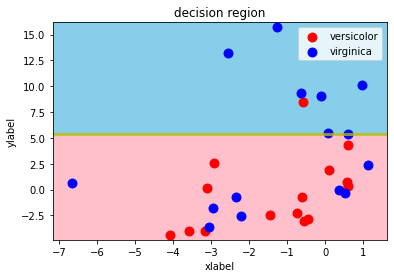

In [139]:
# スクラッチ実装(訓練データ)

decision_region(X_train, y_train, model=reg_scratch)

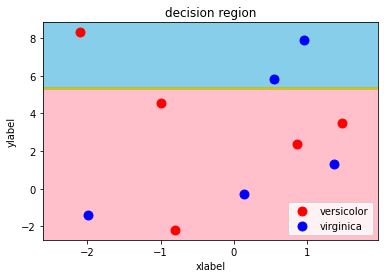

In [140]:
# スクラッチ実装(検証データ)

decision_region(X_test, y_test, model=reg_scratch)

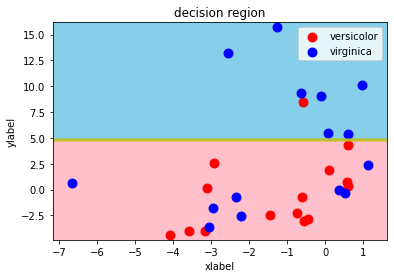

In [141]:
# scikit-learnによる実装(訓練データ)

decision_region(X_train, y_train, model=tree_sklearn)

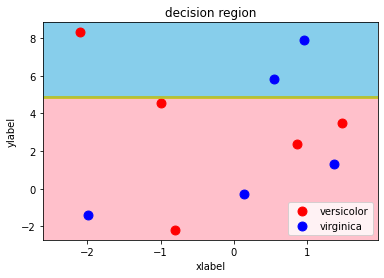

In [142]:
# scikit-learnによる実装(検証データ)

decision_region(X_test, y_test, model=tree_sklearn)